# Spojité regulátory

#Co je spojitý regulátor?

* Spojitý regulátor je zařízení, které neustále monitoruje a upravuje výstupní
veličinu tak, aby odpovídala žádané hodnotě (referenční hodnotě).
* Výstupní veličina regulátoru je spojitou funkcí vstupní veličiny, což znamená, že akční veličina může nabývat libovolné hodnoty v daném rozsahu.
* Veškerá dynamika spojitého regulátoru a regulačního obvodu probíhá bez diskrétních skoků, což umožňuje plynulou a přesnou kontrolu procesů.

## Principy a význam spojitých regulátorů

**Principy:** Spojité regulátory pracují na základě spojitého měření regulované veličiny a výpočtu regulační odchylky, která je rozdílem mezi žádanou hodnotou a skutečnou hodnotou. Na základě této odchylky generuje regulátor akční signál pro ovládání procesu.

**Význam v automatizaci:**

* Zajištění stabilního a efektivního provozu průmyslových a technologických procesů.

* Umožňuje automatizaci složitých procesů, kde je potřeba vysoká přesnost a rychlá reakce na změny v procesu.

* Klíčový pro optimalizaci spotřeby energie, surovin a zlepšení kvality výrobků.

* Používá se v mnoha oblastech, včetně výrobních linek, chemického průmyslu, energetiky a mnoha dalších, kde přesné řízení procesů vede ke zvýšení výkonnosti a bezpečnosti.

# Proporcionální regulátory (P)

**Definice**: Proporcionální regulátor zvyšuje nebo snižuje akční veličinu úměrně regulační odchylce, tedy rozdílu mezi aktuální a žádanou hodnotou regulované veličiny.

**Charakteristika:**

* Snadné nastavení a robustní chování.

* Existuje trvalá regulační odchylka, pokud není dosaženo žádané hodnoty.

**Aplikace**: Ideální pro systémy, kde je přijatelná malá stálá regulační odchylka a potřebujeme rychlou odezvu.

**Diferenciální rovnice:**

$$
u(t) = K_p \cdot e(t)
$$

- Kp = proporcionální zesílení
- e(t) regulační odchylka.

# Přechodová charakteristika proporcionálního regulátoru
Přechodová charakteristika ukazuje, jak systém reaguje na změnu vstupního signálu, konkrétně na skokovou změnu. V případě P regulátoru je výstupní signál (akční veličina) úměrný regulační odchylce, což je rozdíl mezi požadovanou hodnotou (referenční hodnotou) a skutečnou hodnotou měřené veličiny. Tento příklad ukáže, jak se systém chová v reakci na skokovou změnu vstupu, kdy požadovaná hodnota se najednou změní.

Předpokládejme, že máme jednotkový skokový vstup, tzn. vstupní signál se změní z 0 na 1 v určitém čase (například t=0). Proporcionální regulátor s konstantou zesílení Kp​ pak generuje výstup, který je přímo úměrný odchylce od požadované hodnoty.

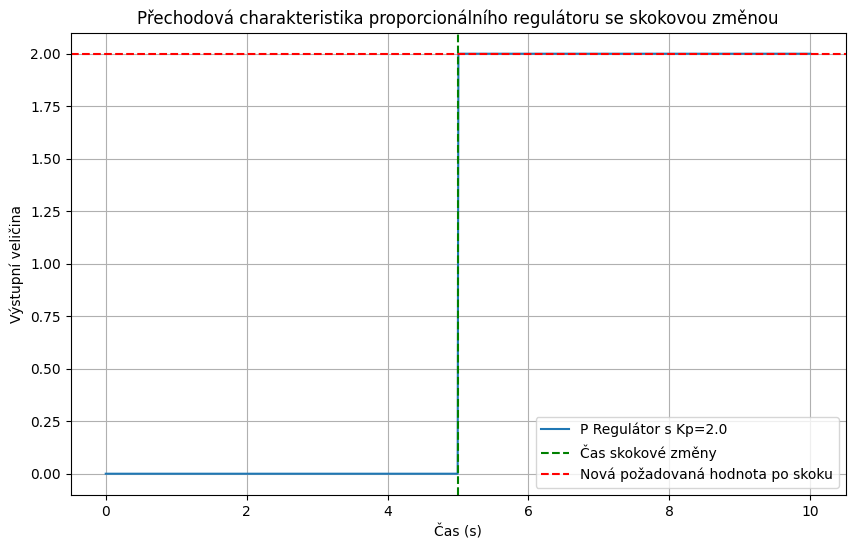

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

# Nastavení konstanty zesílení proporcionálního regulátoru
Kp = 2.0

# Vytvoření časové osy pro simulaci, od 0 do 10 sekund
t = np.linspace(0, 10, 1000)

# Definujeme skokovou změnu v polovině simulovaného časového intervalu (t=5 s)
u_step = np.where(t >= 5, 1, 0)

# Výstup P regulátoru po skokové změně
y_step = Kp * u_step

# Vizualizace přechodové charakteristiky se skutečným skokem
plt.figure(figsize=(10, 6))
plt.plot(t, y_step, label=f'P Regulátor s Kp={Kp}')
plt.title('Přechodová charakteristika proporcionálního regulátoru se skokovou změnou')
plt.xlabel('Čas (s)')
plt.ylabel('Výstupní veličina')
plt.axvline(5, color='green', linestyle='--', label='Čas skokové změny')
plt.axhline(1 * Kp, color='red', linestyle='--', label='Nová požadovaná hodnota po skoku')
plt.legend()
plt.grid(True)
plt.show()


Graf ukazuje přechodovou charakteristiku proporcionálního regulátoru s konstantou zesílení Kp=2.0. Jak můžete vidět, po skokové změně vstupního signálu (v čase t=0) regulátor reaguje okamžitě a udržuje výstupní veličinu na dvojnásobku požadované hodnoty kvůli zesílení Kp​. Červená čára představuje požadovanou hodnotu (v tomto případě jednotkový skok), a ukazuje, že výstupní hodnota regulátoru je přímo úměrná regulační odchylce, která v tomto příkladu odpovídá vstupnímu signálu vynásobenému konstantou zesílení.

Tento jednoduchý model demonstruje základní princip P regulátoru, kde výstup zůstává konstantní po skokové změně vstupu a je přímo ovlivněn konstantou zesílení Kp​. V reálných aplikacích je výběr hodnoty Kp​ klíčový pro dosažení optimálního výkonu regulace, aby se zajistila rychlá reakce na změny bez nadměrného překmitu nebo oscilací

# Integrační regulátory (I)

**Definice**: Integrační regulátor akumuluje regulační odchylku v čase a vytváří akční signál, který je úměrný integrálu odchylky v čase.

**Charakteristika:**

- Umožňuje dosáhnout nulové regulační odchylky v ustáleném stavu.

- Může vést k pomalejší reakci regulátoru na změny.

**Aplikace:** Vhodný pro procesy, kde je prioritou eliminace trvalé regulační odchylky, i za cenu pomalejší reakce.

**Diferenciální rovnice:**

$$
u(t) = K_i \int e(t) \, dt
$$

- Ki = integrační zesílení

# Přechodová charakteristika integračního regulátoru
Integrační regulátor akumuluje odchylku v čase, což znamená, že jeho výstup je integralem regulační odchylky. To způsobí, že výstupní signál bude postupně narůstat (nebo klesat) v závislosti na trvání a velikosti odchylky.

Pro jednoduchost předpokládejme, že konstanta zesílení integračního regulátoru Ki je nastavena na hodnotu, která umožňuje snadnou vizualizaci, a vstupní signál prochází stejnou skokovou změnou v polovině simulovaného časového intervalu jako v předchozím příkladu.

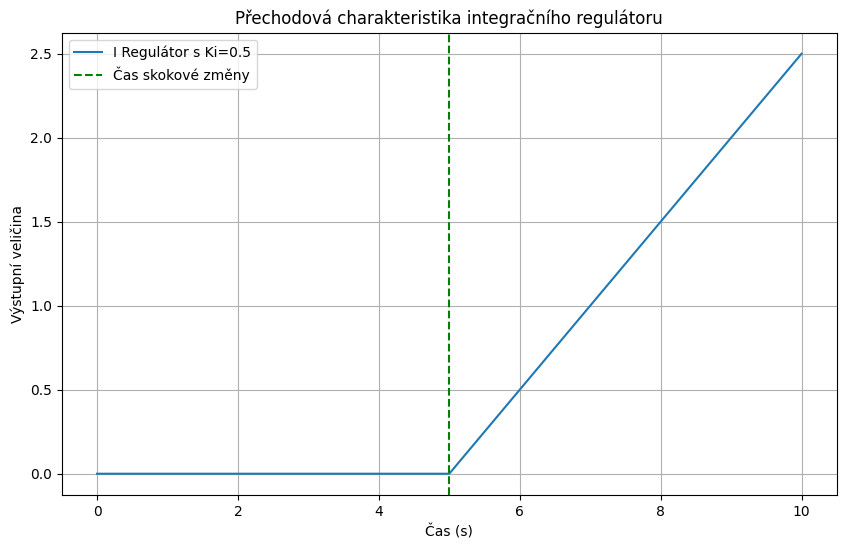

In [3]:
from scipy.integrate import cumtrapz

# Nastavení konstanty zesílení integračního regulátoru
Ki = 0.5

# Výpočet integračního výstupu použitím cumulativní trapézové metody pro numerickou integraci
y_integral = Ki * cumtrapz(u_step, t, initial=0)

# Vizualizace přechodové charakteristiky
plt.figure(figsize=(10, 6))
plt.plot(t, y_integral, label=f'I Regulátor s Ki={Ki}')
plt.title('Přechodová charakteristika integračního regulátoru')
plt.xlabel('Čas (s)')
plt.ylabel('Výstupní veličina')
plt.axvline(5, color='green', linestyle='--', label='Čas skokové změny')
plt.legend()
plt.grid(True)
plt.show()


Graf zobrazuje přechodovou charakteristiku integračního regulátoru s konstantou zesílení Ki=0.5. Jak je vidět, výstup integračního regulátoru začíná narůstat po skokové změně vstupního signálu, která nastává v čase t=5 sekund (zvýrazněno zelenou čárkou). Narůstání výstupu je výsledkem akumulace odchylky v čase, což je základní princip integračního regulátoru.

Výstupní signál se postupně zvyšuje, což ukazuje, jak integrační regulátor reaguje na trvalou odchylku tím, že akumuluje tuto odchylku, což vede k postupnému zvyšování (nebo snižování, pokud je odchylka negativní) akční veličiny. Tento postupný nárůst je způsoben integrací odchylky v čase, což je v kontrastu s okamžitou reakcí proporcionálního regulátoru.

Integrační regulátory jsou užitečné v aplikacích, kde je potřeba eliminovat trvalou regulační odchylku, protože jejich akumulativní efekt zajistí, že se systém nakonec dostane do požadovaného stavu, i když to může trvat déle v porovnání s jinými typy regulátorů.

# Derivační regulátory (D)

**Definice**: Derivační regulátor reaguje na rychlost změny regulační odchylky, tedy derivaci odchylky podle času.

**Charakteristika**:

- Zlepšuje reakci systému na rychlé změny tím, že předvídá budoucí chování systému na základě současných trendů.

- Může být citlivý na šum v měření.

**Aplikace**: Nejčastěji používán ve spojení s P a I regulátory pro vytvoření PID regulátoru, zlepšuje stabilitu a dynamiku systému.

**Diferenciální rovnice**:
-
$$
u(t) = K_d \frac{de(t)}{dt}
$$
 - Kd = derivační zesílení

# Přechodová charakteristika derivačního regulátoru
Derivační regulátor reaguje na rychlost změny regulační odchylky, což znamená, že jeho výstup je odvozen od časové derivace regulační odchylky. Výstup derivačního regulátoru tedy ukazuje, jak rychle se mění vstupní signál, a je zvláště užitečný pro předvídání budoucího chování systému a pro zlepšení jeho stabilitních vlastností tím, že se rychle reaguje na změny.

V našem příkladu budeme simulovat derivační regulátor reagující na stejný jednotkový skokový vstup jako v předchozích příkladech. Pro jednoduchost předpokládáme, že konstanta zesílení derivačního regulátoru Kd je nastavena na hodnotu, která umožňuje snadnou vizualizaci.

Zde použijeme numerickou derivaci k simulaci chování derivačního regulátoru. Derivace bude vypočtena jako rozdíl mezi po sobě jdoucími hodnotami výstupního signálu vzhledem k času, aby se ukázalo, jak derivační regulátor reaguje na změnu.

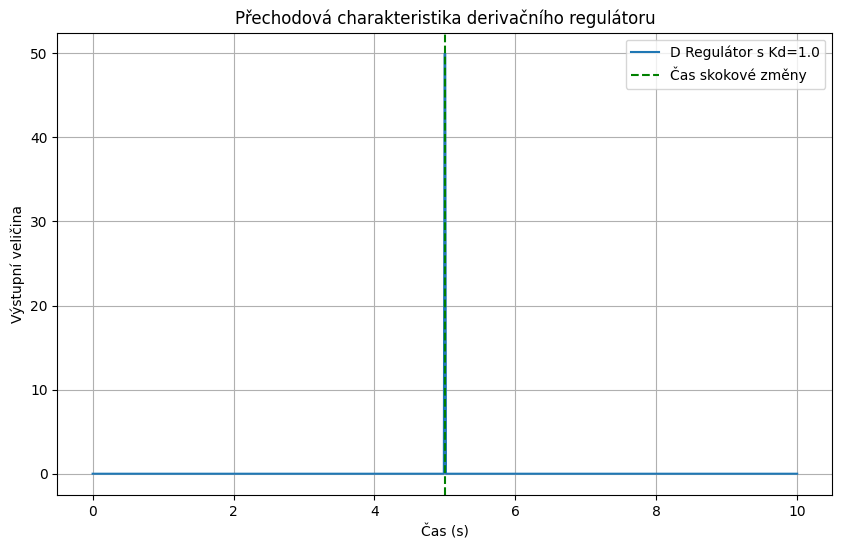

In [4]:
# Numerická derivace vstupního signálu u_step pro simulaci derivačního regulátoru
# Použijeme numpy.diff, který vypočítá rozdíl mezi po sobě jdoucími hodnotami, a np.gradient jako alternativu pro hladší derivaci
Kd = 1.0

# Vypočet derivace vstupu vzhledem k času
dy_dt = np.gradient(u_step, t)

# Výstup D regulátoru je úměrný derivaci vstupního signálu
y_derivative = Kd * dy_dt

# Vizualizace přechodové charakteristiky
plt.figure(figsize=(10, 6))
plt.plot(t, y_derivative, label=f'D Regulátor s Kd={Kd}')
plt.title('Přechodová charakteristika derivačního regulátoru')
plt.xlabel('Čas (s)')
plt.ylabel('Výstupní veličina')
plt.axvline(5, color='green', linestyle='--', label='Čas skokové změny')
plt.legend()
plt.grid(True)
plt.show()


Graf zobrazuje přechodovou charakteristiku derivačního regulátoru s konstantou zesílení Kd=1.0. Jak je vidět, výstup derivačního regulátoru reaguje na rychlost změny vstupního signálu. V okamžiku skokové změny vstupu (v čase t=5 sekund, zvýrazněno zelenou čárkou) dochází k ostrému vrcholu výstupu regulátoru, což odráží okamžitou změnu (derivaci) vstupního signálu.

Derivační regulátor tedy poskytuje vysokou odezvu v okamžiku změny, což je užitečné pro anticipaci a rychlou korekci před možnými oscilacemi nebo nestabilitami systému. Po této okamžité reakci se výstup regulátoru vrací na nulu, jelikož vstupní signál zůstává konstantní a derivační regulátor reaguje pouze na změny vstupu, ne na jeho absolutní hodnotu.

Tato charakteristika činí derivační regulátory vhodnými pro zlepšení dynamických vlastností regulačního systému, zejména v kombinaci s proporcionálními a integračními regulátory v rámci PID regulátoru, kde každý typ regulátoru přispívá k celkovému výkonu a stabilitě systému.

# Klíčové vlastnosti P, I, D regulátorů

**Proporcionální regulátory (P):**

- Rychlá odezva na regulační odchylku.

- Trvalá regulační odchylka v ustáleném stavu.

**Integrační regulátory (I):**

- Eliminace trvalé regulační odchylky v dlouhodobém horizontu.

- Pomalejší reakce, může způsobit překmit při rychlých změnách.

**Derivační regulátory (D):**

- Předvídá budoucí chování systému a zlepšuje stabilitu.

- Citlivost na šum a rychlé změny signálu.

# Praktické aplikace P, I, D regulátorů

**Proporcionální regulátory (P):**

- Kontrola teploty v jednoduchých ohřívacích a chladicích systémech, kde jsou přijatelné malé odchylky od cílové teploty.

**Integrační regulátory (I):**

- Regulace hladiny kapaliny v nádržích, kde je důležité udržet hladinu co nejpřesněji bez trvalých odchylek.

**Derivační regulátory (D):**

- Použití v systémech, kde je potřeba rychle reagovat na změny trendů, například v dynamických procesech jako je rychlá změna zatížení v energetice.

**Kombinované použití (PID regulátory):**

- Široké spektrum aplikací od automatizace výrobních procesů, přes kontrolu teploty, tlaku a průtoku, až po pokročilé aplikace jako jsou autonomní vozidla nebo drony, kde je nutná vysoká přesnost a adaptabilita regulace.

# Proporcionálně integrační regulátory (PI)

**Definice:** Kombinuje vlastnosti P a I regulátorů pro dosažení rychlé reakce na změny a eliminaci trvalé regulační odchylky.

**Výhody:**

- Zajišťuje rychlou odezvu na změnu procesních podmínek a postupně eliminuje regulační odchylku.

- Vhodný pro širokou škálu aplikací, kde je důležitá přesnost a stabilita.

**Příklady použití:**

Kontrola teploty, tlaku, hladiny a průtoku v různých průmyslových procesech.

**Diferenciální rovnice:**
$$
u(t) = K_p \cdot e(t) + K_i \int e(t) \, dt
$$


# Proporcionálně derivační regulátory (PD)

**Definice**: Kombinuje P a D regulátory pro zlepšení reakce systému na rychlé změny bez nutnosti integrace.

**Výhody**:

- Zlepšuje stabilitu systému předvídáním budoucích změn, čímž zrychluje reakci na poruchy.

- Užitečný v systémech s vysokou dynamikou, kde je potřeba rychle reagovat na změny.

**Příklady použití:**

Automobilový průmysl pro kontrolu dynamiky vozidel, automatizované výrobní linky.

**Diferenciální rovnice:**
$$
u(t) = K_p \cdot e(t) + K_d \frac{de(t)}{dt}
$$

# Proporcionálně integračně derivační regulátory (PID)

**Definice**: Integrace P, I a D regulátorů pro maximální výkon, kombinuje výhody všech tří typů.

**Výhody**:

- Vysoká přesnost a rychlá reakce na změny v procesu, schopnost předvídat a efektivně reagovat.

- Univerzální použití ve většině regulačních aplikací.

**Příklady použití:**

Chemický průmysl, automatizace budov, výrobní procesy, kde jsou požadovány vysoká efektivita a přesnost.

**Diferenciální rovnice:**
$$
u(t) = K_p \cdot e(t) + K_i \int e(t) \, dt + K_d \frac{de(t)}{dt}
$$

##Interpretace přechodových charakteristik
Pro ilustraci vlivu nastavení parametrů regulátoru (Kp, Ki, Kd) na přechodové charakteristiky systému vytvoříme jednoduché grafy, které ukazují typické efekty příliš vysokých hodnot každého z těchto parametrů na chování systému. Budeme sledovat klíčové parametry přechodových charakteristik, jako jsou čas vzestupu, překmit, čas ustálení a stálá stavová chyba.

**Vysoké Kp (Proporcionální zesílení)**

- **Chování systému:** Když je Kp nastaveno příliš vysoko, systém reaguje velmi rychle na jakoukoliv odchylku od setpointu. To může vést k rychlému dosažení požadované hodnoty, ale zároveň způsobuje výrazný překmit a potenciálně oscilace kolem setpointu.

- **Interpretace:** Rychlá reakce je často žádoucí, ale příliš velký překmit může být problematický, zejména v citlivých nebo nestabilních systémech. Překmit může signalizovat, že systém je příliš "nervózní" a může potřebovat snížení Kp pro dosažení hladší a stabilnější odezvy.

**Vysoké Ki (Integrační zesílení)**

 - **Chování systému:** Velké Ki způsobuje, že systém akumuluje chybu v čase, což vede k postupnému zvyšování výstupu, dokud není dosaženo setpointu. Toto nastavení může způsobit, že systém bude překračovat požadovanou hodnotu a pomalu se ustaluje.

- **Interpretace:** Integrace je užitečná pro eliminaci stálé chyby, ale příliš vysoké Ki může způsobit pomalé ustálení a nadměrné překmity. Je důležité najít rovnováhu, kde systém eliminuje stálou chybu bez zbytečného zpoždění a oscilací.

**Vysoké Kd (Derivační zesílení)**

  - **Chování systému:** Vysoké Kd zvyšuje citlivost systému na rychlé změny chyby, což může pomoci předcházet překmitům tím, že se anticipuje budoucí chování systému. Nicméně, příliš vysoké Kd může způsobit, že systém bude reagovat  příliš agresivně na malé nebo krátkodobé změny, včetně šumu.

  - **Interpretace:** Derivační složka je užitečná pro zlepšení stabilitních a dynamických vlastností systému, ale přílišná citlivost na změny může vést k nestabilnímu chování. Je nutné pečlivě kalibrovat Kd, aby systém zůstal odolný vůči šumu a malým fluktuacím.

**Shrnutí**

Každý parametr PID regulátoru má specifický účel a jeho správné nastavení je klíčové pro dosažení optimálního výkonu systému. Příliš vysoké hodnoty kteréhokoliv z parametrů mohou vést k nežádoucím efektům, jako jsou překmity, pomalé ustálení nebo nadměrná reakce na šum. Cílem je najít vyvážené nastavení, které zajišťuje rychlou a přesnou reakci na změny s minimálním překmitem a bez dlouhého čekání na ustálení.

Pro demonstraci vytvoříme jednoduché simulované grafy, které znázorní výše uvedené efekty. Tyto grafy budou ilustrovat ideální scénáře pro každý z parametrů, kdy jejich hodnota je nastavena příliš vysoko, a jak to ovlivňuje chování systému. Jde o zjednodušenou ilustraci, ve skutečných systémech by dynamika a odezva závisela na konkrétních parametrech systému a na vzájemné interakci všech parametrů PID regulátoru.

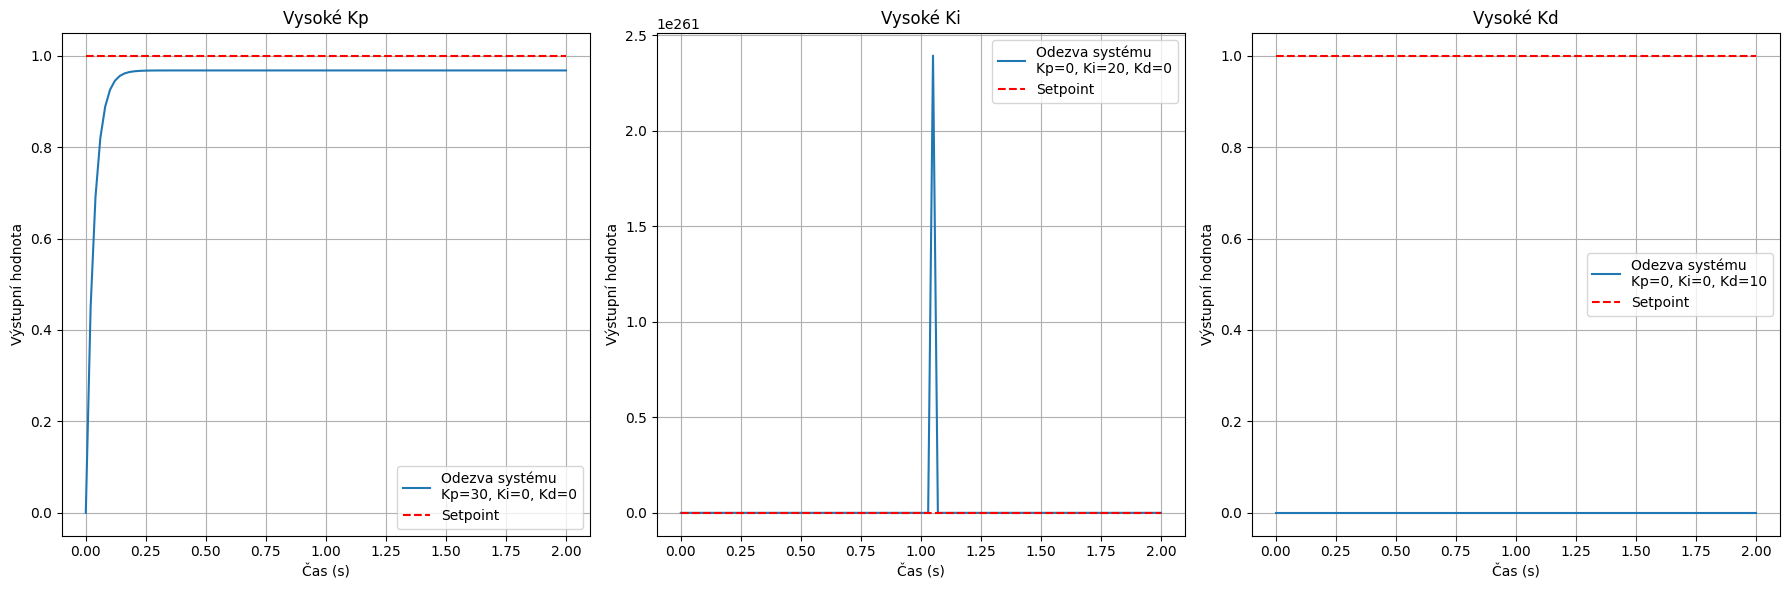

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Definování počátečních podmínek a časové osy
y0 = 0  # Počáteční hodnota výstupu
t = np.linspace(0, 2, 100)  # Časová osa
setpoint = 1  # Cílová hodnota, ke které má systém směřovat

def pid_system_modified(y, t, Kp, Ki, Kd, setpoint):
    global integral_error, previous_error
    error = setpoint - y
    integral_error += error * dt  # Použití pevného časového kroku dt
    derivative_error = (error - previous_error) / dt if t > 0 else 0
    previous_error = error
    u = Kp*error + Ki*integral_error + Kd*derivative_error
    dydt = -y + u
    return dydt

# Výpočet časového kroku z časové osy (předpokládá konstantní krok)
dt = t[1] - t[0]

# Scénáře pro simulaci
scenarios_modified = {
    "Vysoké Kp": (30, 0, 0),
    "Vysoké Ki": (0, 20, 0),
    "Vysoké Kd": (0, 0, 10)
}

# Reset globálních proměnných
integral_error, previous_error = 0, 0

plt.figure(figsize=(18, 6))

for i, (title, (Kp, Ki, Kd)) in enumerate(scenarios_modified.items(), start=1):
    integral_error, previous_error = 0, 0  # Reset pro každý scénář
    y = odeint(pid_system_modified, y0, t, args=(Kp, Ki, Kd, setpoint))

    plt.subplot(1, 3, i)
    plt.plot(t, y, label=f"Odezva systému\nKp={Kp}, Ki={Ki}, Kd={Kd}")
    plt.plot(t, np.full_like(t, setpoint), 'r--', label='Setpoint')
    plt.title(title)
    plt.xlabel('Čas (s)')
    plt.ylabel('Výstupní hodnota')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


# Interaktivní cvičení
Interaktivního cvičení, kde můžeme simulovat chování různých typů regulátorů (P, I, D, PI, PD, PID) s možností nastavit konstanty a hodnoty, je dobrý způsob, jak prakticky pochopit, jak tyto regulátory fungují. Tento typ cvičení je ideální pro výukové účely, protože poskytuje okamžitou vizuální zpětnou vazbu o důsledcích změn nastavení regulátoru.

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from ipywidgets import interact, FloatSlider

# Definice funkce pro model PID systému
def pid_Regulátor(Kp, Ki, Kd, Regulátor, setpoint, t_final):
    # Reset globálních proměnných pro integrální a derivativní členy
    integral_error = 0
    previous_error = 0
    y0 = 0  # počáteční stav
    t = np.linspace(0, t_final, int(t_final*100))  # časová osa

    def pid_system(y, t, Kp, Ki, Kd, setpoint):
        nonlocal integral_error, previous_error
        error = setpoint - y
        integral_error += error * dt
        derivative_error = (error - previous_error) / dt if t > 0 else 0
        previous_error = error

        # Výpočet výstupu regulátoru podle typu
        u = 0
        if 'P' in Regulátor:
            u += Kp * error
        if 'I' in Regulátor:
            u += Ki * integral_error
        if 'D' in Regulátor:
            u += Kd * derivative_error

        dydt = -y + u
        return dydt

    # Výpočet časového kroku z časové osy (předpokládá konstantní krok)
    dt = t[1] - t[0]

    # Spuštění simulace
    y = odeint(pid_system, y0, t, args=(Kp, Ki, Kd, setpoint))

    # Vykreslení grafu
    plt.figure(figsize=(12, 6))
    plt.plot(t, y, label=f"{Regulátor} Odezva systému\nKp={Kp}, Ki={Ki}, Kd={Kd}")
    plt.plot(t, np.full_like(t, setpoint), 'r--', label='Setpoint')
    plt.title(f"{Regulátor} Regulátor")
    plt.xlabel('Čas (s)')
    plt.ylabel('Výstupní hodnota')
    plt.legend()
    plt.grid(True)
    plt.show()

# Interaktivní widgety
interact(pid_Regulátor,
         Kp=FloatSlider(min=0, max=100, step=0.5, value=20),
         Ki=FloatSlider(min=0, max=100, step=0.5, value=0),
         Kd=FloatSlider(min=0, max=100, step=0.5, value=0),
         Regulátor=['P', 'I', 'D', 'PI', 'PD', 'PID'],
         setpoint=FloatSlider(min=0, max=10, step=0.1, value=1),
         t_final=FloatSlider(min=1, max=20, step=1, value=5))


interactive(children=(FloatSlider(value=20.0, description='Kp', step=0.5), FloatSlider(value=0.0, description=…

<function __main__.pid_Regulátor(Kp, Ki, Kd, Regulátor, setpoint, t_final)>

# Specifické aplikace spojitých regulátorů

**Smart Home:** Automatizace klimatizace a vytápění pro optimalizaci spotřeby energie.

**Zemědělství**: Kontrola mikroklimatu v sklenících pro optimální růst rostlin.

**Lékařství:** Přesné dávkování léků a regulace životně důležitých parametrů v medicínských přístrojích.

# Rozdíly mezi spojitými a nespojitými regulátory

**Spojité regulátory:**

- Výstupní signál může nabývat libovolné hodnoty v určitém rozsahu.

- Plynulá regulace umožňuje jemné nastavení výstupu.

**Nespojité regulátory:**

- Výstupní signál se přepíná mezi několika pevně danými hodnotami.

- Typicky rychlejší reakce na změny, ale s větší tendencí k oscilacím kolem žádané hodnoty.

**Základní rozdíl:**
- Hlavní rozdíl spočívá v způsobu, jakým oba typy regulátorů reagují na regulační odchylku a jaký výstupní signál generují pro ovládání procesu.

# Výhody spojitých regulátorů

- Přesnější kontrola a jemné nastavení procesů.

- Menší tendence k oscilacím výstupu, což vede k stabilnějšímu chodu systému.

- Lepší pro aplikace, kde je potřeba plynulá regulace a vysoká přesnost.

# Výhody nespojitých regulátorů

- Jednodušší konstrukce a potenciálně nižší náklady na implementaci.

- Vhodné pro aplikace, kde jsou přijatelné menší oscilace kolem nastavené hodnoty.

- Lepší pro systémy, které vyžadují rychlou reakci na výrazné změny v procesu.

# Výběr mezi spojitými a nespojitými regulátory

- **Spojité regulátory** jsou ideální pro složité a přesné procesy, kde je důležitá kontinuita a jemnost regulace.

- **Nespojité regulátory** jsou vhodné pro robustní aplikace s méně přísnými požadavky na přesnost, ale s potřebou rychlé a jednoduché reakce.

- Výběr regulátoru by měl vždy záviset na specifických potřebách aplikace, včetně požadavků na přesnost, reakční rychlost a ekonomické faktory.

# Kvíz
Udělejte si tento malý kvíz a zjistěte, kolik si toho pamatujete

In [47]:
import ipywidgets as widgets
from IPython.display import display, clear_output

# Definice otázek a odpovědí
questions = {
    "Co umožňuje spojitý regulátor ve vztahu k výstupní veličině?": {
        "a": "Nabývat libovolné hodnoty v daném rozsahu",
        "b": "Nabývat pouze diskrétní hodnoty",
        "c": "Použít pouze binární hodnoty",
        "correct": "a"
    },
    "Jaký je základní princip fungování spojitých regulátorů?": {
        "a": "Měření pouze diskrétních hodnot",
        "b": "Spojité měření a výpočet regulační odchylky",
        "c": "Regulace bez zpětné vazby",
        "correct": "b"
    },
    "Jaké jsou výhody spojitých regulátorů oproti nespojitým?": {
        "a": "Jednodušší konstrukce a nižší náklady",
        "b": "Vysoká přesnost a adaptabilita",
        "c": "Rychlejší reakce na změny",
        "correct": "b"
    },
    "Co způsobí příliš vysoké nastavení proporcionálního zesílení (Kp)?": {
        "a": "Pomalejší reakci na změny",
        "b": "Eliminaci stálé odchylky",
        "c": "Výrazný překmit a oscilace",
        "correct": "c"
    },
    "Co charakterizuje integrační regulátory (I)?": {
        "a": "Způsobují rychlé oscilace",
        "b": "Eliminují stálou odchylku v ustáleném stavu",
        "c": "Předpovídají budoucí chování systému",
        "correct": "b"
    },
    "Jaký je primární účel derivační složky v PID regulátorech?": {
        "a": "Zvyšování citlivosti na dlouhodobé změny",
        "b": "Rychlá reakce na krátkodobé změny",
        "c": "Předvídání budoucích změn v procesu",
        "correct": "c"
    },
    "Proč jsou PID regulátory vhodné pro složité průmyslové procesy?": {
        "a": "Jsou levnější a jednodušší",
        "b": "Poskytují větší flexibilitu a přesnost",
        "c": "Nejsou náchylné k šumu",
        "correct": "b"
    },
    "Co je nejčastějším přínosem PID regulace v automatizovaných procesech?": {
        "a": "Zjednodušení procesů",
        "b": "Zvýšení bezpečnosti",
        "c": "Optimalizace spotřeby energie",
        "correct": "c"
    }
}


# Vytvoření kvízových widgetů
question_widgets = []
for question, options in questions.items():
    question_label = widgets.Label(value=question)
    answer_options = widgets.RadioButtons(
        options=[(options[key], key) for key in ['a', 'b', 'c']],
        description='',
        disabled=False
    )
    answer_options.value = None  # Nyní žádná odpověď není výchozí
    question_widget = widgets.VBox([question_label, answer_options])
    question_widgets.append((question_widget, options['correct']))

# Tlačítko pro vyhodnocení kvízu
submit_button = widgets.Button(description="Vyhodnotit kvíz")

# Funkce pro vyhodnocení kvízu
def evaluate_quiz(b):
    score = 0
    total = len(question_widgets)
    for question_widget, correct_answer in question_widgets:
        user_answer = question_widget.children[1].value
        if user_answer is None:
            # Informuje uživatele, že musí odpovědět na všechny otázky
            display("Prosím, odpovězte na všechny otázky.")
            return  # Přeruší evaluaci, pokud některá otázka není zodpovězena
        if user_answer == correct_answer:
            score += 1
    result = f"Vaše skóre je {score} z {total}."
    clear_output(wait=True)
    display(result)

# Vazba tlačítka na funkci vyhodnocení
submit_button.on_click(evaluate_quiz)

# Zobrazení kvízu
for question_widget, _ in question_widgets:
    display(question_widget)
display(submit_button)

Button(description='Vyhodnotit kvíz', style=ButtonStyle())

# Literatura

- GARZINOVÁ Romana, JANČÍKOVÁ Zora, ZIMNÝ Ondřej, Základy automatizace technologických procesů v teorii:, Ostrava, Vysoká škola Báňská – Technická univerzita Ostrava, 2013, ISBN: 978-80-248-3044-5

- MIEKISCH Jiří, Spojité regulátory, Opava, Střední škola průmyslová a umělecká, 2011